In [1]:
# Step 1: Import required libraries
import tensorflow as tf  # Main deep learning framework
from tensorflow.keras import layers, models  # For building neural networks
import matplotlib.pyplot as plt  # For displaying images and graphs
import numpy as np  # For handling numerical data efficiently

In [3]:
# Step 2: Load the MNIST dataset
# MNIST comes preloaded with TensorFlow, so no extra download is needed.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# Step 3: Normalize the data
# Pixel values in images are from 0 to 255.
# Neural networks work better when inputs are between 0 and 1.
x_train = x_train / 255.0  # Scale training images
x_test = x_test / 255.0    # Scale testing images

In [7]:
# Step 4: Check the shape of data
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Testing data shape:", x_test.shape)    # (10000, 28, 28)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


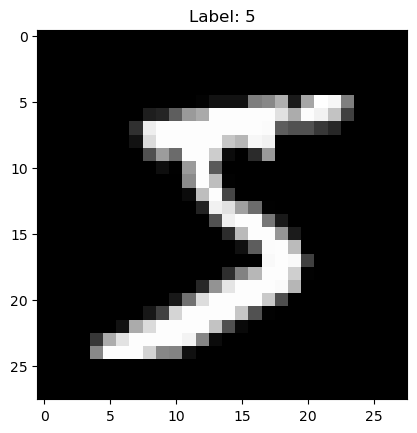

In [15]:
# Step 5: Visualize the first image in the training set
plt.imshow(x_train[0], cmap='gray')  # Show first digit image in grayscale
plt.title(f"Label: {y_train[0]}")  # Show the correct label
plt.show()

In [17]:
# Step 6: Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),        # Convert each 28x28 image into a 1D array of 784 pixels
    layers.Dense(128, activation='relu'),        # First hidden layer with 128 neurons, using ReLU activation
    layers.Dense(10, activation='softmax')       # Output layer with 10 neurons (one for each digit 0-9)
])

C:\Users\senda\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Step 7: Compile the model
model.compile(
    optimizer='adam',                            # Optimizer that updates weights efficiently
    loss='sparse_categorical_crossentropy',      # Loss function for multi-class classification
    metrics=['accuracy']                         # We want to track accuracy during training/testing
)

In [21]:
# Step 8: Train the model
model.fit(x_train, y_train, epochs=5)  # Train for 5 passes through the dataset


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9250 - loss: 0.2647
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9653 - loss: 0.1174
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9763 - loss: 0.0800
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0602
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0467


In [22]:
# Step 9: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)  # Check accuracy on test set
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.9751 - loss: 0.0832

Test accuracy: 0.9750999808311462


In [25]:
# Step 10: Make predictions
predictions = model.predict(x_test)  # Model outputs probabilities for each class

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


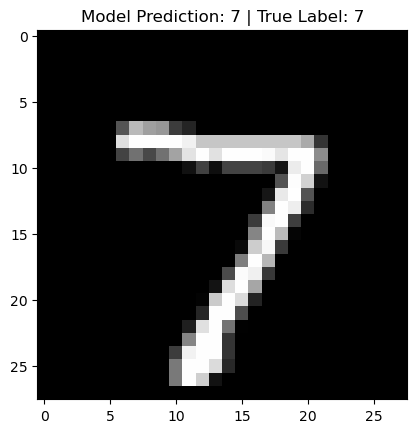

In [32]:
# Step 11: Display a sample prediction
sample_index = 0  # First image from test set
plt.imshow(x_test[sample_index], cmap='gray')  # Show image
plt.title(f"Model Prediction: {np.argmax(predictions[sample_index])} | True Label: {y_test[sample_index]}")
plt.show()